In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#total populations sizes over time (each dataframe contains several runs of the same parameter set)
#renamed them to reflect their immigration rate values
pops_4c_immig_0_51 = pd.read_csv('solo_results/ratios4cEXTRA-stochastic_pop_over_time.csv', delimiter=", ", engine='python') #was 4cEXTRA

pops_4c_immig_0_7 = pd.read_csv('solo_results/ratios4c1-stochastic_pop_over_time.csv',delimiter=", ", engine='python') #was 4c1
pops_4c_immig_0_8 = pd.read_csv('solo_results/ratios4c2-stochastic_pop_over_time.csv',delimiter=", ", engine='python') #was 4c2 
pops_4c_immig_0_9 = pd.read_csv('solo_results/ratios4c3-stochastic_pop_over_time.csv',delimiter=", ", engine='python') #was 4c3




pops_4d1 = pd.read_csv('solo_results/ratios4d1-stochastic_pop_over_time.csv',delimiter=", ", engine='python')
pops_4d2 = pd.read_csv('solo_results/ratios4d2-stochastic_pop_over_time.csv',delimiter=", ", engine='python')
#pops_4cEXTRA['t']

pops4c = [pops_4cEXTRA, pops_4c1, pops_4c2, pops_4c3] #list of all the population dataframes
r_immig_4c = [0.51, 0.7, 0.8, 0.9] #list of the corresponding immigration ratios for the above dataframes

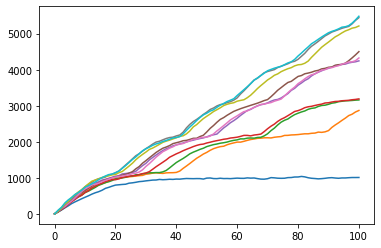

In [48]:
plt.figure(figsize=(6,4))

plt.plot(pops_4cEXTRA['t'], pops_4cEXTRA['4'])


plt.plot(pops_4c1['t'], pops_4c1['4'])
plt.plot(pops_4c1['t'], pops_4c1['7'])
plt.plot(pops_4c1['t'], pops_4c1['12'])

plt.plot(pops_4c2['t'], pops_4c2['4'])
plt.plot(pops_4c2['t'], pops_4c2['7'])
plt.plot(pops_4c2['t'], pops_4c2['12'])

plt.plot(pops_4c3['t'], pops_4c3['4'])
plt.plot(pops_4c3['t'], pops_4c3['7'])
plt.plot(pops_4c3['t'], pops_4c3['12'])

plt.show()

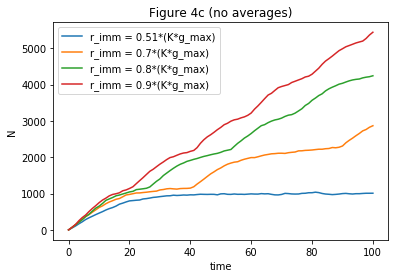

In [49]:
plt.figure(figsize=(6,4))

plt.plot(pops_4cEXTRA['t'], pops_4cEXTRA['4'], label='r_imm = 0.51*(K*g_max)')
plt.plot(pops_4c1['t'], pops_4c1['4'], label='r_imm = 0.7*(K*g_max)')
plt.plot(pops_4c2['t'], pops_4c2['4'], label='r_imm = 0.8*(K*g_max)')
plt.plot(pops_4c3['t'], pops_4c3['4'], label='r_imm = 0.9*(K*g_max)')

plt.title("Figure 4c (no averages)")
plt.xlabel("time")
plt.ylabel("N")
plt.legend()

plt.savefig("solo_plots/fig4c_soloRuns.pdf", bbox_inches="tight")
plt.show()

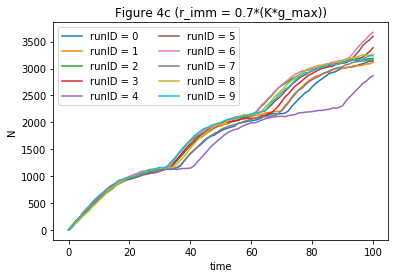

In [45]:
plt.figure(figsize=(6,4))
for i in range(0, 10):
    plt.plot(pops_4c1['t'], pops_4c1[str(i)], label='runID = '+str(i))


    
plt.title("Figure 4c (r_imm = 0.7*(K*g_max))")
plt.xlabel("time")
plt.ylabel("N")
    
plt.legend(ncol=2)
plt.savefig("solo_plots/fig4c_stochasticSpread_r-0.7.pdf", bbox_inches="tight")
plt.show()


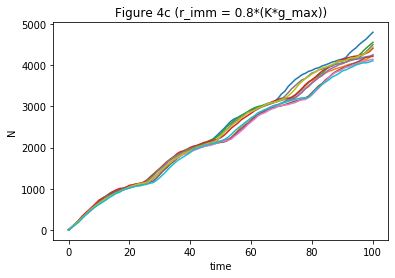

In [46]:
plt.figure(figsize=(6,4))
for i in range(0, 10):
    #plt.plot(pops_4c1['t'], pops_4c1[str(i)], label='runID = '+str(i))
    plt.plot(pops_4c2['t'], pops_4c2[str(i)], label='runID = '+str(i))
    #plt.plot(pops_4c3['t'], pops_4c3[str(i)], label='runID = '+str(i))


plt.title("Figure 4c (r_imm = 0.8*(K*g_max))")
plt.xlabel("time")
plt.ylabel("N")
    
#plt.legend(ncol=2)
plt.savefig("solo_plots/fig4c_stochasticSpread_r-0.8.pdf", bbox_inches="tight")
plt.show()


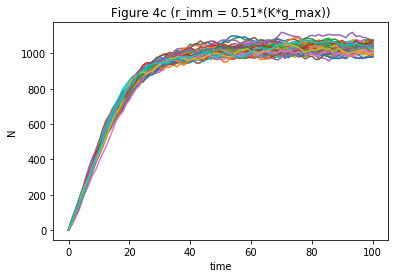

In [52]:
plt.figure(figsize=(6,4))
for i in range(0, 50):
    plt.plot(pops_4cEXTRA['t'], pops_4cEXTRA[str(i)], label='runID = '+str(i))


    
plt.title("Figure 4c (r_imm = 0.51*(K*g_max))")
plt.xlabel("time")
plt.ylabel("N")
    
#plt.legend(ncol=2)
plt.savefig("solo_plots/fig4c_stochasticSpread_r-0.51.pdf", bbox_inches="tight")
plt.show()

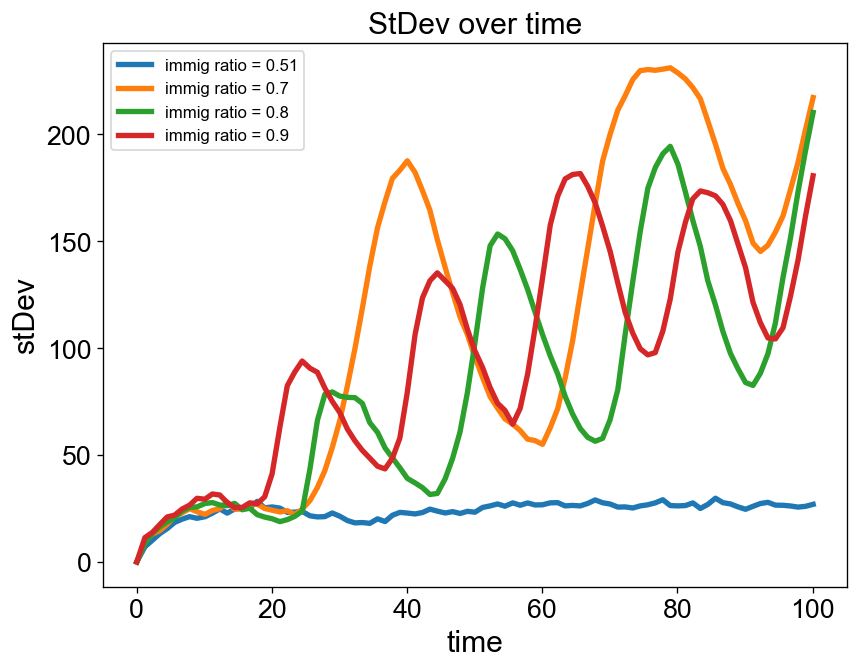

In [32]:
#plot the standard deviation of the population size for each parameter set as a function of time
def stdDevOverTime(pops, params):
    
    fig, ax = plt.subplots(figsize=(8,6), dpi=120)
    plt.rcParams['font.sans-serif'] = "Arial"
    
    for pop, param in zip(pops, params):
        pop_stDev = pop.drop(columns=['t']).std(axis=1)
        plt.plot(pop['t'], pop_stDev, label="immig ratio = "+str(param), lw=3.2)
    
    ax.set_title('StDev over time', fontsize=18)
    ax.set_xlabel('time', fontsize=18)
    ax.set_ylabel('stDev', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.legend()
    plt.show()


stdDevOverTime(pops4c, r_immig_4c)
pops4c1_stDev = pops_4c1.drop(columns=['t']).std(axis=1)
#print(list(pops4c1_stDev))